## EE 461P: Data Science Principles  
### Homework 3 
### Total points: 80
### Due: Thursday, Mar 7, 2023, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Reece Riherd, rdr2793
2. Blake Schwartz, bps826

### Homework group No.: 

# Q1. - Stochastic Gradient Descent (25 pts)
1. (**5pts**) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model (assuming squared error as your loss function): 
$$ y = w_0 + w_1x_1 + w_2x_1^{2}x_2 + w_3e^{-x_1}+ w_4log(x_3) $$ 

Answer:
$$
w_{new} = w_{current} - \eta \frac{\partial L}{\partial w_{current}}
\\L = (y - t)^2
\\y = w_0 + w_1x_1+w_2x_1^2x_2+w_3e^{-x_1}+w_4\log(x_3)
\\L = (w_0 + w_1x_1+w_2x_1^2x_2+w_3e^{-x_1}+w_4\log(x_3) - t)^2
\\w_0^* = w_0 - \eta(2(y - t)(1)) = w_0 - \eta(2(y - t))
\\w_1^* = w_1 - \eta(2(y - t)(x_1)) = w_1 - \eta(2x_1(y - t))
\\w_2^* = w_2 - \eta(2(y - t)(x_1^2x_2) = w_2 - \eta(2x_1^2x_2(y - t))
\\w_3^* = w_3 - \eta(2(y - t)(e^{-x_1})) = w_3 - \eta(2e^{-x_1}(y - t))
\\w_4^* = w_4 - \eta(2(y - t)(\log(x_3)) = w_4 - \eta(2\log(x_3)(y-t))
$$

2. (**20pts**) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1^{2}x_2 + w_3e^{-x_1}+ w_4log(x_3) $$   Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). 

  **a**) Use your new gradient descent regression to predict the data given in ```'samples.csv'```, for 15 epochs, using learning rates: ```[0, .0001, .001, .01, 0.1, 1, 10, 100]``` and regularization (ridge regression) parameters: ```[0,10,100]```. (**13pts**)

  **b**) Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the two best combinations of learning_rate and regularization for SGD. Here "best" means lowest MSE at the end of 15 epochs. (**5pts**)

  ```NOTE``` : In this setting there is no validation/test data, and stopping after a pre-determined number of epochs is an example of an "early stopping" approch to avoid overfitting.(This approach is not ideal, but is sometimes employed in the absence of a validation dataset).

  **c**) Also report the MSE at the end of 15 epochs that you obtained for these two "best" combinations. (**2pts**)


In [95]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        
    def sgd(self, gradient):
        # = please fill this to update self.coef using SGD
        self.coef = self.coef - self.learning_rate * gradient
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        error, gradient = 0
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                # (y - t), t = self.linearPredict(X)
                error = y - self.linearPredict(X)
                # Compute gradients
                gradient = X[:,i]*2*error
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
            
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 5))
        x[:,0] = 1
        x[:,1] = (X[:,0])
        x[:,2] = (X[:,0]**2)*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        x[:,4] = np.log(X[:,2])
        
        return x
        
    def linearPredict(self, X):  
        #compute dot product of self.coef and X
        dot_product = np.dot(self.coef, X)
        return dot_product
        
        

In [30]:
df = pd.read_csv("samples.csv", index_col=False)
X = np.array([df['x1'].values,df['x2'].values]).T
y = df['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

# Q2. Neural Network Basics (10 points)

2.1 Can a multi-layered neural network with only linear activation functions in all hidden layers be represented as a neural network without any hidden layer? Explain your answer. (5 points)

2.2 Suppose you are solving a problem for image datasets using neural networks. You are wondering if you should use neural network with fully-connected layers or a convolutional neural network. Which one do you think is better suited for this task and why? (Read up on convolutional neural networks if we have not covered this in class by due date). (5 points)



Solution

2.1

If there exists a multi-layered neural network with only linear activation functions, then this model will only be able to simulate linear functions. Similarly, a neural network model without any hidden layer is only able to simulate linear functions. Thus, a multi-layered neural network with only linear activation functions can be represented as a neural network without any hidden layers. For example, suppose that there is a neural network with two hidden layers with only linear activation functions and some input X, where X is a vector. Then, X in the first hidden layer can be represented as X\*W1 + b1, and (X\*W1 + b1)\*W2 + b2 in the second layer. Then, the output is ((X\*W1 + b1)\*W2 + b2)\*W3 + b3. But, this expression can be simplified to X\*W + B, where W=W1\*W2\*W3 and B=b1\*w2\*W3 + b2\*W3 + b3. This same function can be represented in a neural network with no hidden layers as a linear function.


2.2
I think that the convolutional neural network is better suited for this task. Because convolutional neural network utilize a series of filters, the convolutional neural network will reduce the dimensions of the input, increasing the efficiency of the model and allowing it to handle large amounts of data. This applies especially well to images, since each image can hold multiple thousands of points of data. When requiring multiple images to be processed in a model, convolutional neural networks can handle the amount of data much better than a neural network with fully connected layers and still provide very high accuracy for their classification.

# Q3. MLP Regression with Pytorch (30 points)
Pytorch provides extensive built-in functions useful for developing and training neural networks. In this exercise, we will try to build a Multi-layer Perceptron for a regression problem.


2.1 Dataset : Download the diabetes dataset from sklearn.datasets. Divide this dataset into train and test sets with 75% of data in train and 25% in test with random_seed = 42. To use this dataset with Pytorch we need to convert it to a pytorch compatible dataset, which is an object of the torch.utils.Dataset class. Use the class below to convert this diabetes dataset to a torch.utils.Dataset object. (5 points)

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [23]:
class DatasetCustom(torch.utils.data.Dataset):
  def __init__(self, X, y):
      self.X = torch.from_numpy(X)
      self.y = torch.from_numpy(y)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

In [41]:
torch.manual_seed(42)
diabetes = load_diabetes()
ddiabetes = DatasetCustom(diabetes.data, diabetes.target)
train_dataset, test_dataset = torch.utils.data.random_split(ddiabetes, [int(0.25*len(ddiabetes)), len(ddiabetes)-int(0.25*len(ddiabetes))])

2.2 Pytorch uses DataLoader class to load and iterate over a dataset for learning. Create a DataLoader object from the pytorch compatible dataset generated above with batchsize = 64 and shuffle = True. You can read more about Pytorch's Dataset and DataLoader [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). (5 points)

In [108]:
loader = DataLoader(ddiabetes, batch_size=64, shuffle=True)
trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

2.3 Network Design : Create a python class for a neural network with the following architecture:

   a) MLP : Linear layer (input_dim=10, output_dim = 4) followed by a ReLu layer and another linear layer (input_dim=4, output_dim = 1).

Pytorch [layers](https://pytorch.org/docs/stable/nn.html) are described here. The individual layers are stacked inside [Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential). 

Each class implements an init() method that defines the network and a forward method that performs the operations defined under the network. See the example below for a 3-layer neural network. (5 points)


In [43]:
class Example(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(784, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    return self.layers(x)

In [49]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(10,4),
            nn.ReLU(),
            nn.Linear(4,1)
        )
    def forward(self, x):
        return self.layers(x)

2.4 Training : Train the above defined neural network using SGD optimizer with learning rate = 0.0001 for 50 epochs while minimizing for the MSELoss. (10 points) 

In [109]:
# Initialize the network
net = MLP()

loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)

for epoch in range(0, 500): 
  print(f'Epoch {epoch+1}')
  loss = 0.0
  optimizer.zero_grad()
  # Iterate over the DataLoader for training data
  for i, data in enumerate(trainloader):
    inputs, targets = data
    inputs = inputs.to(torch.float32)
    targets = targets.to(torch.float32)
    # predict for inputs using net
    pred = net.forward(inputs)
    # compute loss for predictions wrt targets
    loss = loss_function(pred, targets.unsqueeze(1))
    MSE = (pred - torch.square(pred))/len(pred)
    # Call backward on loss
    optimizer.zero_grad()
    grads = loss.backward()
    # take one step of optimization
    optimizer.step()
    
      

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110
Epoch 11

2.4 Plot the epoch loss (average of losses in all batches in one epoch) vs epoch when you set batch size = 64. In another figure, plot for epoch loss when you set batch size = 1. What do you observe? (5 points)

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110
Epoch 11

Text(0.5, 1.0, 'Loss vs. Epoch (batch size = 64)')

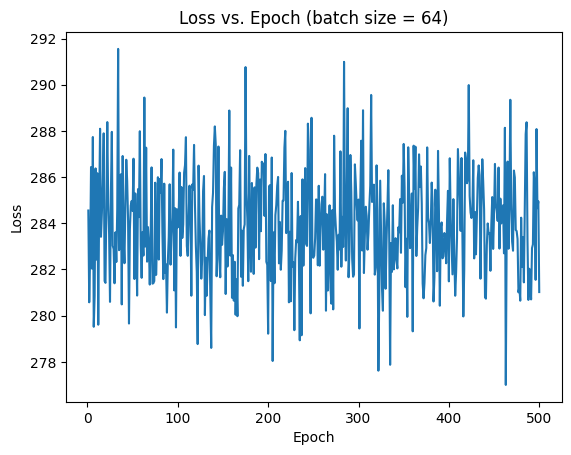

In [110]:
# Initialize the network
net = MLP()

loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)
epochs =  list(range(1,501))
losses = []
for epoch in range(0, 500): 
  print(f'Epoch {epoch+1}')
  loss = 0.0
  optimizer.zero_grad()
  loss_sum = 0
  # Iterate over the DataLoader for training data
  for i, data in enumerate(trainloader):
    inputs, targets = data
    inputs = inputs.to(torch.float32)
    targets = targets.to(torch.float32)
    # predict for inputs using net
    pred = net.forward(inputs)
    # compute loss for predictions wrt targets
    loss = loss_function(pred, targets.unsqueeze(1))
    MSE = (pred - torch.square(pred))/len(pred)
    loss_sum += loss
    # Call backward on loss
    optimizer.zero_grad()
    grads = loss.backward()
    # take one step of optimization
    optimizer.step()
  losses.append(loss_sum.detach().numpy())
plt.plot(epochs,losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Loss vs. Epoch (batch size = 64)")


In [105]:
loader = DataLoader(ddiabetes, batch_size=1, shuffle=True)
trainloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110
Epoch 11

Text(0.5, 1.0, 'Loss vs. Epoch (batch size = 1)')

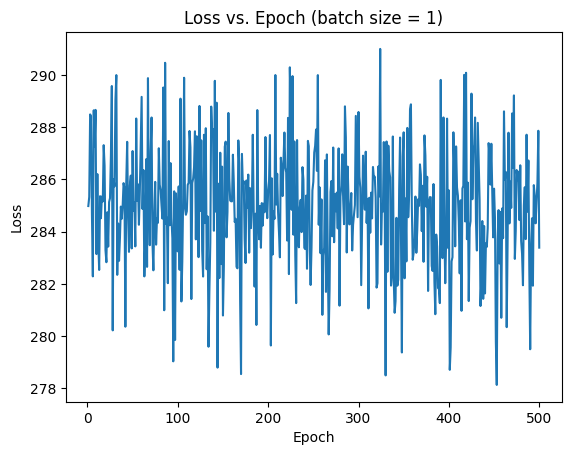

In [111]:
# Initialize the network
net = MLP()

loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)
epochs =  list(range(1,501))
losses = []
for epoch in range(0, 500): 
  print(f'Epoch {epoch+1}')
  loss = 0.0
  optimizer.zero_grad()
  loss_sum = 0
  # Iterate over the DataLoader for training data
  for i, data in enumerate(trainloader):
    inputs, targets = data
    inputs = inputs.to(torch.float32)
    targets = targets.to(torch.float32)
    # predict for inputs using net
    pred = net.forward(inputs)
    # compute loss for predictions wrt targets
    loss = loss_function(pred, targets.unsqueeze(1))
    MSE = (pred - torch.square(pred))/len(pred)
    loss_sum += loss
    # Call backward on loss
    optimizer.zero_grad()
    grads = loss.backward()
    # take one step of optimization
    optimizer.step()
  losses.append(loss_sum.detach().numpy())
plt.plot(epochs,losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Loss vs. Epoch (batch size = 1)")

# Question 4: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons, .

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 